## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
N=10000 #number of rows readed in the file
file_name='myfiles/data_000637.txt'
# read and store the data from the file
data=pd.read_csv(file_name,nrows=N)
# create a dataframe
pdf=pd.DataFrame(data)
print("data extracted from the file :")
pdf

data extracted from the file :


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,1,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
# the number of BX in a ORBIT (the value 'x') corresponds to the maximum value that BX_Counter can be
x=pdf['BX_COUNTER'].max()
print("x=",x)

x= 3563


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
#  data taking lasted = number of ORBIT_CNT * x * 25ns
duration = len(pdf.groupby('ORBIT_CNT').count())*x*25/10**6
print("duration (ms) = ",duration)

duration (ms) =  8.996575


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
# add the time column with the time in nano second
pdf['time'] = pdf['ORBIT_CNT']*x*25+pdf['BX_COUNTER']*25+pdf['TDC_MEAS']*(25/30)
print("new data frame with colum time :")
pdf

new data frame with colum time :


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,3.446490e+14
9996,1,0,60,3869200267,701,5,3.446490e+14
9997,1,0,59,3869200267,707,23,3.446490e+14
9998,1,0,63,3869200267,706,15,3.446490e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
# Replace the values of HEAD by an array of random int (1 or 0)
pdf['HEAD']=np.array([np.random.randint(0,2) for x in range (0,N)])
print("new data frame with HEAD 0 or 1 :")
pdf

new data frame with HEAD 0 or 1 :


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,0,0,124,3869200167,2374,27,3.446490e+14
2,0,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,3.446490e+14
9996,0,0,60,3869200267,701,5,3.446490e+14
9997,0,0,59,3869200267,707,23,3.446490e+14
9998,1,0,63,3869200267,706,15,3.446490e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
# select only the rows where pdf['HEAD']==1 and store it in a new dataframe
pdf_head1 = pdf[pdf['HEAD']==1]
print("new data frame with HEAD 0 or 1 :")
pdf_head1

new data frame with HEAD 0 or 1 :


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,1,0,123,3869200167,2374,26,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
6,1,0,61,3869200167,2772,14,3.446490e+14
7,1,0,139,3869200167,2776,0,3.446490e+14
...,...,...,...,...,...,...,...
9992,1,0,63,3869200267,614,28,3.446490e+14
9993,1,0,64,3869200267,619,5,3.446490e+14
9994,1,0,57,3869200267,696,27,3.446490e+14
9995,1,0,61,3869200267,696,11,3.446490e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

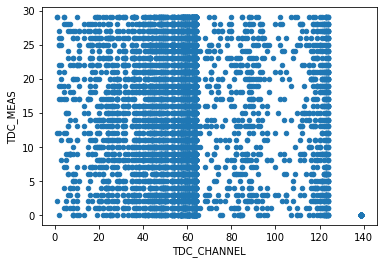

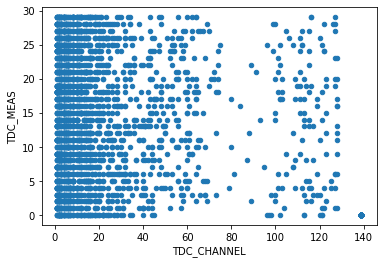

In [19]:
# create a dataframe per FPGA
pdf_fpga0 = pdf[pdf['FPGA']==0]
pdf_fpga1 = pdf[pdf['FPGA']==1]

import matplotlib.pyplot as plt
# plot the number of counts per TDC channel for each FPGA
pdf_fpga0.plot(x ='TDC_CHANNEL', y='TDC_MEAS', kind = 'scatter')
pdf_fpga1.plot(x ='TDC_CHANNEL', y='TDC_MEAS', kind = 'scatter')
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [45]:
# Find the TDC channels with most counts for FPGA = 0
groupbytdc = pdf_fpga0.groupby('TDC_CHANNEL').count()
print("dataframe group by TDC_CHANNEL:\n",groupbytdc)
top3noisychannel = groupbytdc.sort_values(by=['TDC_MEAS'],ascending = False)[0:3]
print("top3noisychannel for FPGA = 0:\n",top3noisychannel.index.values)

# Find the TDC channels with most counts for FPGA = 1
groupbytdc = pdf_fpga1.groupby('TDC_CHANNEL').count()
print("dataframe group by TDC_CHANNEL:\n",groupbytdc)
top3noisychannel = groupbytdc.sort_values(by=['TDC_MEAS'],ascending = False)[0:3]
print("top3noisychannel for FPGA = 1:\n",top3noisychannel.index.values)

dataframe group by TDC_CHANNEL:
              HEAD  FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS  time
TDC_CHANNEL                                                   
1               4     4          4           4         4     4
2              10    10         10          10        10    10
3               8     8          8           8         8     8
4              11    11         11          11        11    11
5              11    11         11          11        11    11
...           ...   ...        ...         ...       ...   ...
121            45    45         45          45        45    45
122            55    55         55          55        55    55
123           138   138        138         138       138   138
124           130   130        130         130       130   130
139           599   599        599         599       599   599

[117 rows x 6 columns]
top3noisychannel for FPGA = 0:
 [139  63  64]
dataframe group by TDC_CHANNEL:
              HEAD  FPGA  ORBIT_CNT  BX_COUNTE

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [53]:
# group by ORBIT_CNT to have one row per unique orbit, then get the number of rows
numberofuniqueorbit = len(pdf.groupby('ORBIT_CNT').count())
print("the number of unique orbits : ",numberofuniqueorbit)

# select the rows of the dataframe where TDC_CHANNEL=139
pdfWithTDCCHANNEL139=pdf[pdf['TDC_CHANNEL']==139]
print("\ndataframe with only the rows where  TDC_CHANNEL=139 :\n",pdfWithTDCCHANNEL139)
# group by ORBIT_CNT to have one row per unique orbit, then get the number of rows
numberofuniqueorbit=pdfWithTDCCHANNEL139.groupby('ORBIT_CNT').count()
print("dataframe group by ORBIT_CNT :\n",numberofuniqueorbit)
print("the number of unique orbits with at least one measurement from TDC_CHANNEL=139 : \n",len(numberofuniqueorbit))

the number of unique orbits :  101

dataframe with only the rows where  TDC_CHANNEL=139 :
       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS          time
7        1     0          139  3869200167        2776         0  3.446490e+14
15       0     1          139  3869200167        2797         0  3.446490e+14
30       1     0          139  3869200167        3085         0  3.446490e+14
39       0     0          139  3869200167        3186         0  3.446490e+14
48       0     0          139  3869200168          23         0  3.446490e+14
...    ...   ...          ...         ...         ...       ...           ...
9912     0     1          139  3869200266        1217         0  3.446490e+14
9939     0     0          139  3869200266        1369         0  3.446490e+14
9950     1     1          139  3869200266        1700         0  3.446490e+14
9963     1     0          139  3869200266        1846         0  3.446490e+14
9986     0     0          139  3869200267         6